**<b><font color="red">ch11. N차원 배열 만들기</font><b>**

- N차원 배열 객체
- 행렬 개념으로 이해
- C언어로 구현된 고성능 수치계산 패키지 Numpy 이용
- C/C+, 포트란. 코드 통합도구

# 1절. 넘파이 패키지 사용.

In [1]:
import numpy as np
a = np.arange(15) #0부터 15앞까지 1씩 증가하는 1차원 배열.
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [5]:
a = np.arange(15).reshape(3,5) # 3행5열로 reshape 하겠다.
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [6]:
type(a) #a 변수 자체의 타입 : N차원 배열

numpy.ndarray

In [8]:
a.dtype #a 변수의 요소들의 type => 내부의 값들이(타입이) 같아야한다.

dtype('int32')

In [13]:
a.dtype.name #a 변수의 요소들의 type

'int32'

In [14]:
a.itemsize # 요소 하나하나의 사이즈(byte 단위)

4

In [9]:
a.ndim # 축 수 (차원수)

2

In [10]:
a.shape # 배열구조

(3, 5)

In [11]:
a.size #a 배열요소의 총 수

15

In [16]:
# dtype 속성을 바꾸면 형변환이 되지 않는다.

In [25]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
a.size

12

In [27]:
a.dtype # 0 =32bit , 1=32bit , 2=32bit ~~~ 하나하나 32bit이다.

dtype('int32')

In [28]:
a.dtype = np.int64 # a 요소의 dtype을 int64(bit)으로

In [29]:
a.dtype

dtype('int64')

In [30]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [31]:
a.size

6

# 2절. 넘파이 배열
<pre>
-array() 함수를 이용한 다른 파이썬 구조(벡터구조)를 넘파이 배열로 변환
-넘파이 배열을 생성하는 기타 함수를 : arange, ones, zeros
-특수 라이브러리 함수(ex. random) 이용
- [넘파이 Docs](http://numpt.org/doc/stable/index.html)
</pre>

## 2.1 array( ) 함수로 넘파이 배열 만들기

In [33]:
import numpy as np
a = np.array([2,4,6]) #reshape 해서 변경 가능.
a

array([2, 4, 6])

In [34]:
for i in a:
    print(i , end='\t')

2	4	6	

In [36]:
a[1] #인덱스1번방 조회

4

In [40]:
a.shape # 1차원.

(3, 1)

In [41]:
#1,6,9에서 하나가 x.1 로 실수로 되어버리면 전체가 실수로 바뀐다.
a = np.array([1,6,9.1]).reshape(3,1) 
a

array([[1. ],
       [6. ],
       [9.1]])

In [43]:
a.dtype # 상단에서 실수값이 있기때문에 float 타입으로 되었다.

dtype('float64')

In [45]:
# 벡터로 넣음. 배열이라서 서로의 행마다 데이터가 같아야한다.
b = np.array([(1.5,2.3),(4,5)]) 
# 자동 dtype 세팅
b

array([[1.5, 2.3],
       [4. , 5. ]])

In [47]:
np.__version__ # 버젼 확인.

'1.19.2'

In [49]:
a = np.array([1, 2, 3, 4.1]).reshape(2,2) #2행 2열짜리 2차원 배열
a

array([[1. , 2. ],
       [3. , 4.1]])

In [51]:
a.dtype # 1.  , 2.   , 3.   , 4.1 실수 하나때문에 모두 float 형으로 되었다.

dtype('float64')

In [58]:
b = np.array([[1,2,3],[4,5,6]]) # reshape 안하면 2행 3열짜리로 생성. #dtype 자동 세팅
b

array([[1, 2, 3],
       [4, 5, 6]])

In [53]:
b.dtype

dtype('int32')

In [61]:
b = np.array([[1,2,3],[4,5,6]], dtype=np.int64) #dtype을 인수로 세팅
b

array([[1, 2, 3],
       [4, 5, 6]], dtype=int64)

In [62]:
b.dtype

dtype('int64')

In [66]:
b = b.astype(np.int32) #b안에 있는 요소들 dtype 바꾸기

In [65]:
b.dtype

dtype('int32')

In [67]:
#for row in b:
list_ = [[1,2,3],[4,5,6]]
list_

[[1, 2, 3], [4, 5, 6]]

In [76]:
# 리스트에서의 .
for row in list_: #몇행 몇열을 엑세스 할수 없다.
    for data in row:
        print(data, end='\t')
    print()

1	2	3	
4	5	6	


In [77]:
# 리스트에서의 .
for i , row in enumerate(list_):
    for j, data in enumerate(row):
        print("{}행 {}열 : {}".format(i,j,data),end='\t')
    print()

0행 0열 : 1	0행 1열 : 2	0행 2열 : 3	
1행 0열 : 4	1행 1열 : 5	1행 2열 : 6	


In [73]:
list_[0][1] #리스트에서의 인덱싱 방법.

2

In [75]:
list_[0][0:2] # 리스트에서의 인덱싱 슬라이싱.

[1, 2]

In [68]:
b = np.array([[1,2,3],[4,5,6]], dtype = np.int16)
b

array([[1, 2, 3],
       [4, 5, 6]], dtype=int16)

In [78]:
for row in b:
    for item in row:
        print(item, end='\t')
    print()

1	2	3	
4	5	6	


In [79]:
for i, row in enumerate(b):
    for j, item in enumerate(row):
        print("{}행{}열 : {}".format(i, j, item), end="\t")
    print()

0행0열 : 1	0행1열 : 2	0행2열 : 3	
1행0열 : 4	1행1열 : 5	1행2열 : 6	


In [81]:
b[0,1], b[0][1] #b[0][1]가능하나 왼쪽처럼 쓰인다. #0행1열. => 넘파이 배열에서의 인덱싱.

(2, 2)

In [82]:
b[0, 0:2] #넘파이 배열에서의 슬라이싱.

array([1, 2], dtype=int16)

In [3]:
c = np.array([[1,2],[3,4]], dtype = complex) # , dtype = complex 복소수 타입.
c

array([[1.+0.j, 2.+0.j],
       [3.+0.j, 4.+0.j]])

In [4]:
d = np.array(c, copy = False) # copy = False 복사 하지마라 : 즉, 서로의 주소가 같다.
print('d= ',d, sep='\n')
print(id(c),id(d))
print('d의 요소 타입은 : ',d.dtype) #c 타입과 같다.
d[0,0] = 100 # d에만 수정했지만 
print('c= ',c, sep='\n') # c값도 수정이 되어있다.

d= 
[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]
2590860776272 2590860776272
d의 요소 타입은 :  complex128
c= 
[[100.+0.j   2.+0.j]
 [  3.+0.j   4.+0.j]]


In [5]:
# copy = True 복사 하라 : 즉, 서로의 주소가 다르다.
d = np.array(c, copy = True, dtype= int) # d 의 타입은 int 로. => 큰값(복소수)에서 작은값(int)으로.
print('d= ',d, sep='\n')
print(id(c),id(d))
print('d의 요소 타입은 : ',d.dtype) 
d[0,0] = 999
print('c= ',c, sep='\n')

d= 
[[100   2]
 [  3   4]]
2590860776272 2590860919792
d의 요소 타입은 :  int32
c= 
[[100.+0.j   2.+0.j]
 [  3.+0.j   4.+0.j]]


<ipython-input-5-4122b0033fa9>:2: ComplexWarning: Casting complex values to real discards the imaginary part
  d = np.array(c, copy = True, dtype= int) # d 의 타입은 int 로. => 큰값(복소수)에서 작은값(int)으로.


## 2.2 기본값이 있는 배열 만들기
<pre>
- zeros : 요소가 다 '0'
- ones : 요소가 다 '1'
- empty : 초기내용은 임의값인 배열(메모리 상태에 따라 달라짐.)

* 위의 함수로 만들어진 배열의 dtype은 float64 이나, dtype을 따로 지정할 수 있음.
</pre>

In [6]:
np.zeros( (3,4) ) # 3행 4열짜리 2차원 배열(단, 요소값 전체가 다 0 [0. ,])

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [7]:
x = np.zeros( (2,3,4), dtype = np.int16 ) #2면 3행4열짜리 3차원배열
# dtype을 int16로 지정.
print(x)
print(x.dtype)
print(x.itemsize)

[[[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]

 [[0 0 0 0]
  [0 0 0 0]
  [0 0 0 0]]]
int16
2


In [8]:
np.ones((2,5), dtype = np.int8)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=int8)

In [9]:
np.empty( (2,3) ) #대부분 튜플로 들어간다.
#empty 는 고정값으로 나오지 않는다.

array([[0., 0., 0.],
       [0., 0., 0.]])

## 2.3 연속된 값을 갖는 배열 만들기
- np.arange(from, to ,by , dtype=None) : from부터 by씩 건너뛴 값을 to 앞까지(to미포함) 목록으로 N차원 배열을 만든다.
- 'from'과 'by'는 생략 가능. from 생략시 0, by 생략시 1.

- np.linspace(from, to, num) : from부터 to 까지(to포함) num개 숫자들을 N차원 배열로 만듬.

In [21]:
np.arange(10,30,5, dtype = np.float64)

array([10., 15., 20., 25.])

In [11]:
np.arange(0,2,0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [22]:
np.linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [23]:
from numpy import linspace # 해당 패키지에서 해당 함수만 이용하고 싶을때.
linspace(0,2,9)

array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  ])

In [17]:
# linspace 는 많은 수의 점들을 생성할때 유용.
from numpy import pi
x = linspace(0, 2*pi, 100)
print(x)
f = np.sin(x)
# print(f)

[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.36372547
 3.42719199 3.4906585  3.55412502 3.61759154 3.68105806 3.74452458
 3.8079911  3.87145761 3.93492413 3.99839065 4.06185717 4.12532369
 4.1887902  4.25225672 4.31572324 4.37918976 4.44265628 4.5061228
 4.56958931 4.63305583 4.69652235 4.75998887 4.82345539 4.88692191
 4.95038842 5.01385494 5.07732146 5.14078798 5.2042545  5.26772102
 5.33118753 5.39465405 5.45812057 5.52158709 5.58505361 5.648520

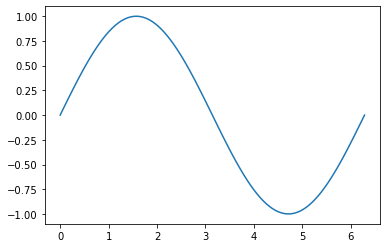

In [18]:
import matplotlib.pyplot as plt
plt.plot(x,f)
plt.show() # [<matplotlib.lines.Line2D at 0x288d1207820>] 안뜨게 하고싶으면.

In [19]:
x = np.random.normal(0, 1, 1000) # 평균:0, 표준편차가 1인. 정규분포값 1000개 
x

array([ 3.27239865e-01, -2.47730248e-01, -7.28008031e-01, -8.06941573e-01,
       -4.91520931e-01,  6.61556758e-01, -5.55229318e-01,  4.46546738e-01,
        1.64018910e+00, -7.34517187e-01,  7.13567130e-02,  5.02577913e-01,
       -2.14661449e+00, -1.83821041e-01, -2.02600611e-02, -2.82480793e-01,
        9.65942276e-01,  1.25300656e+00, -1.27789493e+00,  3.44525021e-01,
        7.86302937e-01,  1.48191615e+00,  9.10698799e-01,  9.23173057e-01,
       -1.28152833e+00,  9.86904275e-01,  8.76483880e-01, -1.26954927e+00,
        7.22317098e-01, -6.20223028e-01, -2.93565529e-01, -7.03566387e-01,
       -2.66838752e-01,  1.10746050e-01,  4.53626697e-01,  8.66437544e-03,
        3.32564090e-01, -1.05438806e+00,  4.78354728e-01, -6.69170207e-01,
        1.04718522e-01, -1.65731162e-02, -1.95899916e+00, -2.32886889e-01,
        2.11980604e-01, -7.04761931e-01,  2.44263132e+00, -1.37948465e+00,
        2.76449317e-01,  1.40328682e+00, -1.53445142e+00, -4.80536003e-01,
       -1.34870305e+00, -

(array([ 12.,  35., 130., 224., 240., 200., 107.,  42.,   9.,   1.]),
 array([-2.76118912, -2.13701065, -1.51283218, -0.88865371, -0.26447524,
         0.35970323,  0.9838817 ,  1.60806017,  2.23223864,  2.85641711,
         3.48059558]),
 <BarContainer object of 10 artists>)

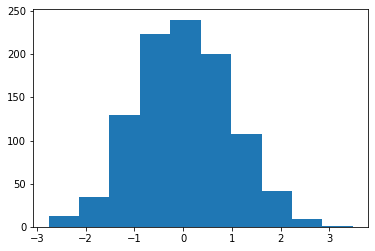

In [20]:
plt.hist(x)

## 2.4 배열의 차원 변경하기

In [120]:
# np.random.seed(1) 시드값 고정. 
t = np.random.random((3,4)) #3행 4열 2차원 배열(random 수.)
t

array([[0.90391669, 0.0177155 , 0.48345034, 0.39198516],
       [0.76340885, 0.19721461, 0.61640157, 0.27482263],
       [0.00337859, 0.1653416 , 0.45976328, 0.64709996]])

In [121]:
t * 10 #요소마다 *10이 된다.

array([[9.03916687, 0.17715504, 4.83450338, 3.91985159],
       [7.63408852, 1.97214612, 6.16401569, 2.74822626],
       [0.0337859 , 1.65341603, 4.5976328 , 6.47099964]])

In [122]:
# floor 버림.
a = np.floor(t*10)
a

array([[9., 0., 4., 3.],
       [7., 1., 6., 2.],
       [0., 1., 4., 6.]])

In [123]:
a.shape

(3, 4)

In [124]:
a.ravel() #차원을 무조건 1차원으로 바뀐다. (단, a가 바뀌는것은 아님.)

array([9., 0., 4., 3., 7., 1., 6., 2., 0., 1., 4., 6.])

In [125]:
a

array([[9., 0., 4., 3.],
       [7., 1., 6., 2.],
       [0., 1., 4., 6.]])

In [128]:
a.reshape(2,6) # 2행 6열로. 단, a값이 바뀐게 아니다.
# shape가 수정된 배열을 반환(a는 그대로.)

array([[9., 0., 4., 3., 7., 1.],
       [6., 2., 0., 1., 4., 6.]])

In [129]:
a

array([[9., 0., 4., 3.],
       [7., 1., 6., 2.],
       [0., 1., 4., 6.]])

In [130]:
# a는 3행4열짜리 2차원배열. 2차원배열은 행렬(matrix)로 이해 가능.
a.T # 전치행렬 (행과 열을 거꾸로.)

array([[9., 7., 0.],
       [0., 1., 1.],
       [4., 6., 4.],
       [3., 2., 6.]])

In [131]:
a.transpose() # 전치행렬을 반환 (단, a의 값은 그대로.)

array([[9., 7., 0.],
       [0., 1., 1.],
       [4., 6., 4.],
       [3., 2., 6.]])

In [132]:
a

array([[9., 0., 4., 3.],
       [7., 1., 6., 2.],
       [0., 1., 4., 6.]])

In [135]:
a.resize((2,6)) #a의 차원을 진짜로 수정. 따라서 a값도 바뀌었다.

In [134]:
a

array([[9., 0., 4., 3., 7., 1.],
       [6., 2., 0., 1., 4., 6.]])

In [136]:
a.reshape(3,-1) # => -1 로 주어지면 해당 차원의 크기가 자동계산.

array([[9., 0., 4., 3.],
       [7., 1., 6., 2.],
       [0., 1., 4., 6.]])

In [144]:
a.reshape(-1, 3) # 행에 -1 가능. 따라서 reshape 에는 -1가능. 많이 쓰이는 문법.
# 몇행이지 아는데 몇열인지 모를때, 몇열은 아는데 몇행인지 모를때.

array([[9., 0., 4.],
       [3., 7., 1.],
       [6., 2., 0.],
       [1., 4., 6.]])

In [140]:
a.resize(3,4)
a

array([[9., 0., 4., 3.],
       [7., 1., 6., 2.],
       [0., 1., 4., 6.]])

In [143]:
a.resize((3, -1)) #resize 에는 -1 불가. (튜플로 넣어라.)

ValueError: negative dimensions not allowed

In [146]:
# 로또번호 6개(1~45)를 구해서 sort하여 1차원 배열에 넣기.

In [147]:
45*np.random.random(6)  #0부터 45미만의 실수 생성.

array([12.35780577, 10.29911287, 44.36543934, 32.83948157, 18.25683333,
       17.94972021])

In [156]:
while True:
    a = np.floor(45*np.random.random(6))+1 # a 는 0~45사이의 실수 생성
    a.sort() #sort 정렬.
    # 리스트컨플리헨션. + set(중복떨어지고) + len(6개가 나오게끔.)
    if len(set([int(data) for data in a]))==6: 
        print(a)
        break;

[19. 24. 28. 35. 38. 40.]


In [159]:
np.array([[1,2],[2.0,'1']]) #모두 문자형으로 바뀜.

array([['1', '2'],
       ['2.0', '1']], dtype='<U32')

## 2.5 배열 인쇄

In [160]:
# 배열이 너무 커서 인쇄할 수 없는 경우,
print(np.arange(100000))

[    0     1     2 ... 99997 99998 99999]


In [163]:
print(np.arange(10000).reshape(10,1000))

[[   0    1    2 ...  997  998  999]
 [1000 1001 1002 ... 1997 1998 1999]
 [2000 2001 2002 ... 2997 2998 2999]
 ...
 [7000 7001 7002 ... 7997 7998 7999]
 [8000 8001 8002 ... 8997 8998 8999]
 [9000 9001 9002 ... 9997 9998 9999]]


<pre>
- 상단의 예제처럼, 배열을 출력할때 배열이 너무 커서
- 행이나 열이 너무 길때, 생략된것을 나오게끔 자동으로 건너뛰고 모서리만 인쇄.
- 이동작을 비활성화하고 넘파이가 전체 배열을 인쇄하도록 하려면.
- 인쇄 옵션을 변경. threshold값을 큰 값으로
</pre>

In [167]:
# np.inf = 무한대
# import sys => sys.maxsize 사용할때 임폴트.
# np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold=10000)
#내 시스템에서의 sys.maxsize 

In [168]:
print(np.arange(10000).reshape(10,1000))

[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45   46   47   48   49   50   51   52   53   54   55
    56   57   58   59   60   61   62   63   64   65   66   67   68   69
    70   71   72   73   74   75   76   77   78   79   80   81   82   83
    84   85   86   87   88   89   90   91   92   93   94   95   96   97
    98   99  100  101  102  103  104  105  106  107  108  109  110  111
   112  113  114  115  116  117  118  119  120  121  122  123  124  125
   126  127  128  129  130  131  132  133  134  135  136  137  138  139
   140  141  142  143  144  145  146  147  148  149  150  151  152  153
   154  155  156  157  158  159  160  161  162  163  164  165  166  167
   168  169  170  171  172  173  174  175  176  177  178  179  180  181
   182  183  184  185  186  187  188  189  190  191  192  193  1

In [171]:
np.set_printoptions(threshold=100) # 작은값으로 돌리면.

In [172]:
print(np.arange(10000).reshape(10,1000)) # 다시 ... 생략된다.

[[   0    1    2 ...  997  998  999]
 [1000 1001 1002 ... 1997 1998 1999]
 [2000 2001 2002 ... 2997 2998 2999]
 ...
 [7000 7001 7002 ... 7997 7998 7999]
 [8000 8001 8002 ... 8997 8998 8999]
 [9000 9001 9002 ... 9997 9998 9999]]


 ## 2.6 기본연산 동작
 ### 1)배열의 요소별 연산

In [173]:
a = np.array([20,30,40,50])
b = np.arange(4)
print(a)
print(b)

[20 30 40 50]
[0 1 2 3]


In [174]:
a + b # 요소별로. 0번째끼리 + , 1번째끼리. 즉, 인덱스별로 연산 한다.

array([20, 31, 42, 53])

In [175]:
a - b

array([20, 29, 38, 47])

In [178]:
a / b # 0에 가까운 무한대같은 0.0000~ 으로 나오는게 있어서 오류메세지처럼 나온다.

<ipython-input-178-391d9b585a83>:1: RuntimeWarning: divide by zero encountered in true_divide
  a / b # 0에 가까운 무한대같은 0.0000~ 으로 나오는게 있어서 오류메세지처럼 나온다.


array([        inf, 30.        , 20.        , 16.66666667])

In [185]:
a * b # 요소별 연산.

array([  0,  30,  80, 150])

In [179]:
a = np.array([20,30,40,50])

In [180]:
a < 35 # 요소별 연산

array([ True,  True, False, False])

In [183]:
# a 배열에서 35보다 작은값들만 추출.
a[a<35] # True 값들만 나오고 False 값은 안나온다.

array([20, 30])

### 2) 행렬의 곱  = > (@)  
         요소별 곱 ' * '

In [190]:
A = np.array([[1,1],[0,1]]) #2차원

In [191]:
B = np.array([[2,0],[3,4]]) #2차원

In [189]:
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [196]:
print("요소별 곱 A*B = ", A*B, sep='\n')
print("행렬 곱 A@B = ", A@B, sep='\n')
print("행렬 곱 A.dot(B) = ", A.dot(B), sep='\n') #내적.

요소별 곱 A*B = 
[[2 0]
 [0 4]]
행렬 곱 A@B = 
[[5 4]
 [3 4]]
행렬 곱 A.dot(B) = 
[[5 4]
 [3 4]]


### 3) 복합대입 연산자 사용 (+=, -=, *=, ...  )


In [208]:
a = np.ones((2,3), dtype=int) #2차원 2행3열 배열. int32 형.
a

array([[1, 1, 1],
       [1, 1, 1]])

In [198]:
a.dtype

dtype('int32')

In [199]:
b = np.random.random((2,3)) #2차원 2행3열 배열. float64형.
b

array([[0.45117744, 0.99401978, 0.34709338],
       [0.6976518 , 0.86263433, 0.23973237]])

In [200]:
b.dtype

dtype('float64')

In [201]:
a += 3
a

array([[4, 4, 4],
       [4, 4, 4]])

In [202]:
b += a
b

array([[4.45117744, 4.99401978, 4.34709338],
       [4.6976518 , 4.86263433, 4.23973237]])

In [204]:
a += b # b(float64) 라서 a+b 는 float64 로 된다.
# 즉, 64비트가 32비트 안에 안들어간다는 오류가 나온다.

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int32') with casting rule 'same_kind'

In [206]:
a = np.ones(3 , dtype= np.int16) #데이터가 3개 들어간 1차원 .
b = np.linspace(0, np.pi,3) # 0부터 3까지 의 pi값. 1차원.
print(a)
print(b)

[1 1 1]
[0.         1.57079633 3.14159265]


In [207]:
c = a + b
print(c)
print(c.dtype)

[1.         2.57079633 4.14159265]
float64


In [209]:
c = a + b*1j
c

array([[1.+0.j        , 1.+1.57079633j, 1.+3.14159265j],
       [1.+0.j        , 1.+1.57079633j, 1.+3.14159265j]])

In [211]:
c.dtype # 복소수.

dtype('complex128')

### 4) 배열 요소별 집계 => 배열요소 전체의 sum, min, ...

In [212]:
a = np.random.random((2, 3))
a

array([[0.12464593, 0.81518812, 0.37554532],
       [0.05811119, 0.95538323, 0.4741911 ]])

In [217]:
a = np.array([[2,2,2,4],
             [4,3,2,1]])
a

array([[2, 2, 2, 4],
       [4, 3, 2, 1]])

In [218]:
print('a 배열 요소들 전체의 합 : ',a.sum())
print('a 배열 요소들 전체의 최소 : ',a.min())
print('a 배열 요소들 전체의 최대 : ',a.max())

a 배열 요소들 전체의 합 :  20
a 배열 요소들 전체의 최소 :  1
a 배열 요소들 전체의 최대 :  4


### 5) 배열 축 별 집계 => 행별 sum, min, ... / 열별 sum, min, ...

In [219]:
a = np.array([[2,2,2,4],
             [4,3,2,1]])
a

array([[2, 2, 2, 4],
       [4, 3, 2, 1]])

In [221]:
print("a 배열의 행별 합(2열짜리 배열) : ",a.sum(axis=1)) # axis=1 축 수= 1

a 배열의 행별 합(2열짜리 배열) :  [10 10]


In [222]:
print("a 배열의 열별 합(4열짜리 배열) : ",a.sum(axis=0)) #axis =0 행 고정.

a 배열의 열별 합(4열짜리 배열) :  [6 5 4 5]


In [223]:
print("a 배열의 행별 최솟값 : ",a.min(axis=1))
print("a 배열의 열별 최솟값 : ",a.min(axis=0))

a 배열의 행별 최솟값 :  [2 1]
a 배열의 열별 최솟값 :  [2 2 2 1]


In [224]:
print("a 배열의 행별 최솟값 : ",a.max(axis=1))
print("a 배열의 열별 최솟값 : ",a.max(axis=0))

a 배열의 행별 최솟값 :  [4 4]
a 배열의 열별 최솟값 :  [4 3 2 4]


In [228]:
# 누적합
print(a)
a.cumsum(axis=1) # 행별로 누적합
# 2, 4(2+2), 6(4+2), 10(6+4)
# 4, 7(4+3), 9(7+2), 10(9+1)

[[2 2 2 4]
 [4 3 2 1]]


array([[ 2,  4,  6, 10],
       [ 4,  7,  9, 10]], dtype=int32)

In [227]:
print(a)
a.cumsum(axis=0) # 열별로 누적합.

[[2 2 2 4]
 [4 3 2 1]]


array([[2, 2, 2, 4],
       [6, 5, 4, 5]], dtype=int32)

In [230]:
b = np.arange(24).reshape(2,3,4) # 2*3*4 =24 가 되어야 에러가 안뜬다.
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [231]:
b[0,2,1],b[0][2][1]

(9, 9)

In [232]:
b.sum(), b.min(),b.max()

(276, 0, 23)

In [236]:
#b = np.arange(24).reshape(2,3,4)
b.sum(axis=0) #면은 빼고, 같은 행과 열끼지 sum
# 0+12 , 1+13, 2+14 ~~

array([[12, 14, 16, 18],
       [20, 22, 24, 26],
       [28, 30, 32, 34]])

In [242]:
b.sum(axis=1) #행을 뺴고, 같은면, 같은 열 끼리 sum.
# 0+4+8 = 12 , 1+5+9=15 , 2+6+10=18, 3+7+11 = 21 , ...

array([[12, 15, 18, 21],
       [48, 51, 54, 57]])

In [238]:
b.sum(axis=2) # 열을 빼고 같은면, 같은 행끼리 sum

array([[ 6, 22, 38],
       [54, 70, 86]])

In [239]:
np.sum(b) #요소들 전체 합

276

In [240]:
np.mean(b) #요소들 전체 평균

11.5

In [241]:
np.std(b) #요소들 전체 표준편차

6.922186552431729

In [243]:
np.var(b) # 분산

47.916666666666664

In [245]:
np.std(b) * np.std(b)

47.916666666666664

In [246]:
np.sqrt(np.var(b))
# np.sqrt()의 매개변수에는 스칼라변수, 배열변수 모두 가능

6.922186552431729

In [247]:
import math
math.sqrt(np.var(b))
#math.sqrt() 의 매개변수는 스칼라변수만.

6.922186552431729

## 2.7 그외 함수들

In [250]:
a = np.arange(3)
np.sqrt(a) #a에 루트씌운다.

array([0.        , 1.        , 1.41421356])

In [251]:
np.exp(a) #지수 e의 0승,1승,2승

array([1.        , 2.71828183, 7.3890561 ])

In [252]:
a

array([0, 1, 2])

In [254]:
b = np.array([10,11,12])
np.add(a,b) # a와 b를 더한다. (메모리를 절약하면서.)

array([10, 12, 14])

In [257]:
# 메모리 사용량 측정(메모리 프로파일러.)를 로드하고 임의의 데이터 생성후 np.add
# 아나콘다 프롬프트에서 (! pip install memory_profiler) (! ~~) 는 현재 이 코드에서 실행시킨다.
#(! ~~) => 추천하지 않는 방법.

%load_ext memory_profiler
A = np.random.random(100000000)
B = np.random.random(100000000)
C = np.random.random(100000000)

In [256]:
np.random.random(10) #10개의 실수 생성.

array([0.56496623, 0.0604869 , 0.46233097, 0.06389969, 0.83204324,
       0.69018051, 0.82633152, 0.58714504, 0.58001789, 0.61254801])

In [260]:
# %%사용시 주석과 같이 사용불가.
# $$time : 셀을 실행할때 소요시간 출력.
# %memit : 메모리 사용량 출력.
# increment: 1434.30 MiB 사용 메모리.
# Wall time: 2.21 s  걸린시간.

In [258]:
%%time
%memit G = A * B + C
print(6)

peak memory: 3904.46 MiB, increment: 1434.30 MiB
6
Wall time: 2.21 s


In [259]:
%%time
%memit T= A*B; G=T+C; del T
print(6)

peak memory: 4751.79 MiB, increment: 1517.02 MiB
6
Wall time: 2.18 s


In [261]:
%%time
%memit T= A*B; T+=C
print(T)

peak memory: 3997.72 MiB, increment: 762.94 MiB
[0.74955376 0.40928517 0.86222376 ... 1.12182581 1.20194882 1.32749091]
Wall time: 1.7 s


In [262]:
# 상단의 문법은 메모리 사용량 더욱 감소와 작동시간 감소 

In [264]:
# np.add() 경우 배열별 연산을 할 경우 메모리 절약.

In [263]:
%%time
%memit T= A*B; np.add(T, C, T)
print(T)

peak memory: 4663.25 MiB, increment: 675.29 MiB
[0.74955376 0.40928517 0.86222376 ... 1.12182581 1.20194882 1.32749091]
Wall time: 1.76 s


In [ ]:
# ===== 여기까지 행과 열 수 가 같을경우 =========

## 2.8 브로드캐스팅

In [266]:
from numpy import array
a = array([[1,2,3]]) # 1차원 경우의 브로드캐스팅. 10+1 , 10+2, 10+3
b = array([[10,20,30]])
np.add(a, 10)

array([[11, 12, 13]])

In [267]:
# 2차원 배열의 경우,  두배열의 후미 축(열)의 크기가 동일해야한다.
a = array([[0.,0,0], #4행 3열.
           [10.,10,10],
           [20,20,20],
           [30,30,30]])
b = array([[5,5,5]])
np.add(a, b)      # 5,5,5 + 0,0,0 . 5,5,5+10,10,10. ~~

array([[ 5.,  5.,  5.],
       [15., 15., 15.],
       [25., 25., 25.],
       [35., 35., 35.]])

In [268]:
np.multiply(a,b)

array([[  0.,   0.,   0.],
       [ 50.,  50.,  50.],
       [100., 100., 100.],
       [150., 150., 150.]])

In [269]:
# 열 갯수가 다를때.
from numpy import array, newaxis
a = array([0,10,20,30])
b = array([1,2,3])
np.add(a,b)
# a+ b 도 불가.

ValueError: operands could not be broadcast together with shapes (4,) (3,) 

In [271]:
#newaxis ?
a[:,newaxis] # 배열의 새로운 축을 추가. 2차원인 4x1 로 생성.

array([[ 0],
       [10],
       [20],
       [30]])

In [273]:
# 4행1열 배열 + 1행 4열 연산.
x = np.add(a[:,newaxis],b)
x

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [274]:
a[0]+b[1] == x[0,1]
a[1]+b[2] == x[1,2]

True

# 3절. 배열 합치기/분할하기

In [275]:
a = np.arange(10)*3
a

array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27])

## 3.1 인덱싱과 슬라이싱.

In [277]:
#인덱싱.
a[2]

6

In [278]:
a[-1]

27

In [280]:
a[10] # 없는 인덱싱은 에러.

IndexError: index 10 is out of bounds for axis 0 with size 10

In [281]:
# 2) 슬라이싱
a[2:5] #2번째 인덱스부터 5앞까지

array([ 6,  9, 12])

In [283]:
a[0:11:2]  # from , by 생략 가능.
# 슬라이싱은 벗어난 인덱스 값도 가능.

array([ 0,  6, 12, 18, 24])

In [284]:
a[::-1] #끝부터 처음까지 거꾸로. => a배열을 거꾸로 출력.

array([27, 24, 21, 18, 15, 12,  9,  6,  3,  0])

In [286]:
a[:6:2] = -99 # [-99,-99,-99] 를 -99로 가능.
a

array([-99,   3, -99,   9, -99,  15,  18,  21,  24,  27])

### 도움말 문서들
- 인덱싱 : https://docs.scipy.org/doc/numpy/user/basics.indexing.html
- 배열 인덱싱 : https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html
- newaxis : https://docs.scipy.org/doc/numpy/reference/constants.html#numpy.newaxis


In [287]:
# 3) 다차원 인덱싱.

In [1]:
def f(x ,y):
    return 10*x+y

In [2]:
f(2,3)

23

In [4]:
import numpy as np # int(4bit) 
#(5,4)= 5행4열 짜리 2차원 넘파이배열을 int16type으로 만듬(그 안의 데이터는 f함수에 의해.)
a = np.fromfunction(f, (5,4), dtype=np.int16) 
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]], dtype=int16)

In [6]:
import numpy as np # int(32bit) 
#(5,4)= 5행4열 짜리 2차원 넘파이배열을 int16type으로 만듬(그 안의 데이터는 f함수에 의해.)
#람다함수 이용.
a = np.fromfunction(lambda x, y : 10*x+y, (5,4), dtype=np.int) 
a

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [7]:
a[2,3]

23

In [8]:
a[-2,-1] # 인덱스는 음수 가능. 음수인덱스는 마지막부터 n번째.

33

In [9]:
a[5,0] #벗어난 인덱스를 인덱싱 하면 오류.

IndexError: index 5 is out of bounds for axis 0 with size 5

In [11]:
a[0:10,-1]#마지막 열들만 출력(0행부터 9행까지)

array([ 3, 13, 23, 33, 43])

In [13]:
a # a의 생김새 확인.

array([[ 0,  1,  2,  3],
       [10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33],
       [40, 41, 42, 43]])

In [14]:
a[1:4, 0:2] #1~3행 출력. 0~1열까지 출력.

array([[10, 11],
       [20, 21],
       [30, 31]])

In [25]:
a[1:4, :] # 1~3행 모든열.(마지막 축(열)인덱스 생략 가능)

array([[10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [26]:
a[1:4, ] # 1~3행 모든열.(마지막 축(열)인덱스 생략 가능)

array([[10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [27]:
a[1:4, ...] # 1~3행 모든열 (마지막 축(열)인덱스 생략 가능) => ...  누락된 인덱스의 전체를 의미.

array([[10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [28]:
a[1:4] # 1~3행 모든열 (마지막 축(열)인덱스 생략 가능)

array([[10, 11, 12, 13],
       [20, 21, 22, 23],
       [30, 31, 32, 33]])

In [29]:
a[:, -1:] #모든 행에 마지막열.  

array([ 3, 13, 23, 33, 43])

In [30]:
a[:, -1:-3:-1] # 모든행에 마지막 열, 마지막 전열. # from to by => -1:-3:-1

array([[ 3,  2],
       [13, 12],
       [23, 22],
       [33, 32],
       [43, 42]])

In [31]:
a[... , -1:-3:-1] # 모든행에 마지막 열, 마지막 전열.

array([[ 3,  2],
       [13, 12],
       [23, 22],
       [33, 32],
       [43, 42]])

In [33]:
b = np.arange(24).reshape(2,3,4) #2면 3행 4열 3차원
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [34]:
b[1, 0, 0] #1면 0행 0열

12

In [46]:
# 0면 모두 출력.

In [40]:
b[0] # 첫번째 축만 쓸 경우.  ,:,: 생략 가능 

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [45]:
# 1면 모두 출력.

In [35]:
b[1, :, :] #1면에, :모든행, :모든열

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [37]:
b[1] # 첫번째 축만 쓸 경우.  ,:,: 생략 가능 

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [44]:
# 1행들 모두 출력

In [41]:
b[:, 1, :]

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [42]:
b[:, 1, ... ] 

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [43]:
b[:, 1]

array([[ 4,  5,  6,  7],
       [16, 17, 18, 19]])

In [47]:
# 1열들 모두 출력

In [48]:
b[:,:,1]

array([[ 1,  5,  9],
       [13, 17, 21]])

In [50]:
b[... , 1]  # ... 은 맨앞이나 맨뒤 둘중 하나만 위치.

array([[ 1,  5,  9],
       [13, 17, 21]])

In [51]:
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [53]:
for i, data in enumerate(b):  # i = 면
    for j , row in enumerate(data): # j = 행
        for k, item in enumerate(row): # k = 열 , item = data
            print("{}면 {}행 {}열 : {}".format(i,j,k, item),end='\t')
        print()
    print()

0면 0행 0열 : 0	0면 0행 1열 : 1	0면 0행 2열 : 2	0면 0행 3열 : 3	
0면 1행 0열 : 4	0면 1행 1열 : 5	0면 1행 2열 : 6	0면 1행 3열 : 7	
0면 2행 0열 : 8	0면 2행 1열 : 9	0면 2행 2열 : 10	0면 2행 3열 : 11	

1면 0행 0열 : 12	1면 0행 1열 : 13	1면 0행 2열 : 14	1면 0행 3열 : 15	
1면 1행 0열 : 16	1면 1행 1열 : 17	1면 1행 2열 : 18	1면 1행 3열 : 19	
1면 2행 0열 : 20	1면 2행 1열 : 21	1면 2행 2열 : 22	1면 2행 3열 : 23	



In [55]:
for i, data in enumerate(b):  # i = 면
    for j , row in enumerate(data): # j = 행
        for k, item in enumerate(row): # k = 열 , item = data
            print(item, end=' ') # 한줄로 주르륵. 이렇게 사용안한다.

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 

In [57]:
print(list(b.flat))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


In [62]:
# 도움말. b.flat??

In [63]:
b.flat??

In [58]:
for item in b.flat:
    print(item, end=' ')

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 

## 3.2 두 배열을 쌓아 합치기
**- vstack(tup) : 아래에 추가하는 방식으로 쌓아서 합침.  * 반드시 tup(튜플)** <br>
**- hstack(tup) : 옆으로 추가하는 방식으로 쌓아서 합침. * 반드시 tup(튜플)** <br>
**- dstack(tup) : 마지막 축(열)을 쌓아 합침. 0열들 끼리 쌓고, 1열끼리 쌓고.** <br>

In [64]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [66]:
a, b = c[0], c[1] # 0면 = a , 1면 = b

In [67]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [68]:
b

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [71]:
np.vstack( (a,b) ) # 수직쌓기. (튜플만 들어감)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [73]:
np.hstack( (a,b) ) #수평(열) 합치기

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [75]:
np.dstack((a,b)) #0열끼리, 0면에, 1열끼리 1면, 2열끼리 2면 ~~

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

**- column_stack(tup) : 1차원 배열을 열단위로 배열하여 2차원 배열로 만든다.** 

In [76]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])
np.column_stack( (a,b,c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [77]:
np.vstack( (a,b) )

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [78]:
np.hstack( (a,b) )

array([1, 2, 3, 4, 5, 6, 7, 8])

In [79]:
a[:,np.newaxis]

array([[1],
       [2],
       [3],
       [4]])

In [82]:
np.hstack((a[:, np.newaxis], b[:, np.newaxis], c[:, np.newaxis]))
# np.column_stack( (a,b) ) 와 같다.

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [81]:
np.column_stack( (a,b,c) )

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

**- row_stack(tup) : vstack() 과 같음. 행단위로 쌓아준다.**

In [83]:
np.row_stack( (a,b,c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [84]:
np.vstack( (a,b,c) )

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

**- stack(arr_tup, axis = 0) : axis 속성에 따라 넘파이 배열을 합친다.** <br>
**- arr_tup : 합칠 배열의 모음 (어레이튜플.)** <br>
**- axis =0 : 첫번째 차원 , axis = -1 이면 마지막 차원이 된다.** <br>

In [85]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [86]:
b = np.arange(12, 24).reshape(3,4)
b

array([[12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [89]:
np.stack( (a,b), axis=0 ) # a,b를 차원이 다르게 합친다.(면으로 합침) 결국 2면이 된다.

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [91]:
np.stack( (a,b),axis=1 ) # a,b를 차원이 다르게 행끼리 합침.

array([[[ 0,  1,  2,  3],
        [12, 13, 14, 15]],

       [[ 4,  5,  6,  7],
        [16, 17, 18, 19]],

       [[ 8,  9, 10, 11],
        [20, 21, 22, 23]]])

In [93]:
np.stack( (a,b),axis=2 ) # 행들을 열로 바꾸고 열끼리 합친다.

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

In [94]:
np.stack( (a,b),axis = -1 ) # 마지막 차원으로 합친다.

array([[[ 0, 12],
        [ 1, 13],
        [ 2, 14],
        [ 3, 15]],

       [[ 4, 16],
        [ 5, 17],
        [ 6, 18],
        [ 7, 19]],

       [[ 8, 20],
        [ 9, 21],
        [10, 22],
        [11, 23]]])

## 3.3 r_, c_ 

In [95]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

In [97]:
np.r_[a,b,c]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [98]:
np.c_[a,b,c]

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [99]:
# 2차원 으로
np.r_[[a],[b],[c]]

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

## 3.4 하나의 배열을 여러개 작은 배열로 분할하기
**- hsplit(arry, indices_or_section) : 두번째 축(2차원의 경우 세로축)을 따라 분할** <br>
**- vsplit(arry, indices_or_section) : 첫번째 축(2차원의 경우 가로축)을 따라 분할** <br>
**- dsplit(arry, indices_or_section) : 3번째 차원을 나눔** <br>
* arry : 분할할 배열
* indices_or_section : 정수 또는 1차원 배열 형식 -> 정수의 경우 분할할 배열의 수, 
                        [2,5,7] 분할 되어질 인덱스를 의미

In [103]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [119]:
a_vsplit = np.vsplit(a, 3) #분할된것을 리스트로 출력.
a_vsplit # 가로 축을 따라서 3개의 배열로 출력.

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [108]:
type(a_vsplit)

list

In [109]:
a_vsplit[0]

array([[0, 1, 2, 3]])

In [106]:
np.vsplit(a, 2) # 에러.

ValueError: array split does not result in an equal division

In [116]:
a_hsplit = np.hsplit(a, 4) # 세로 축을 따라 배열로.
a_hsplit

[array([[0],
        [4],
        [8]]),
 array([[1],
        [5],
        [9]]),
 array([[ 2],
        [ 6],
        [10]]),
 array([[ 3],
        [ 7],
        [11]])]

In [117]:
a_hsplit[0].shape

(3, 1)

In [121]:
b = np.arange(24).reshape(2,3,4)
b

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [126]:
b_split = np.hsplit(b, 3) # 두번째 축(행)을 이용해서 split
b_split                   # 3차원배열 b를 3개의 3차원 배열로 split

[array([[[ 0,  1,  2,  3]],
 
        [[12, 13, 14, 15]]]),
 array([[[ 4,  5,  6,  7]],
 
        [[16, 17, 18, 19]]]),
 array([[[ 8,  9, 10, 11]],
 
        [[20, 21, 22, 23]]])]

In [125]:
b_split[0].shape

(2, 1, 4)

In [129]:
b_vsplit = np.vsplit(b, 2) # 3차원 배열 b를 첫번째 축을 기반으로 나눠서 2개의 배열로 분할.
b_vsplit

[array([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]]),
 array([[[12, 13, 14, 15],
         [16, 17, 18, 19],
         [20, 21, 22, 23]]])]

In [131]:
b_vsplit[0].shape

(1, 3, 4)

In [139]:
b_dsplit = np.dsplit(b, 2) # 3번째 차원을 기준으로 2개의 3차원 배열로 나눔
b_dsplit # 0~9 와 12~21 사이가 떨어진 이유는 서로 면 이라서 떨어진것이다.

[array([[[ 0,  1],
         [ 4,  5],
         [ 8,  9]],
 
        [[12, 13],
         [16, 17],
         [20, 21]]]),
 array([[[ 2,  3],
         [ 6,  7],
         [10, 11]],
 
        [[14, 15],
         [18, 19],
         [22, 23]]])]

In [140]:
b_dsplit[0].shape

(2, 3, 2)

**- split(arry, indices_or_section, axis=? )
 * axis= 0 : vsplit() 과 동일
 * axis= 1 : hsplit() 과 동일
 * axis= 2 : 3차원이상에서 동작하며, dsplit() 과 동일
 
- 2개를 1개씩 나누거나 , 6개를 3개로 나누거나 딱딱 맞아야함.
  6을 4로 나눠라 불가.

In [141]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [144]:
np.split(a, 3, axis=1) #에러. 아래와 같은 방법으로 해결가능.

ValueError: array split does not result in an equal division

In [143]:
np.split(a, [3, 6], axis=1) # [리스트] or (튜플) 가능.
# [3,6] 나누고자 하는 인덱스.

[array([[ 0,  1,  2],
        [10, 11, 12]]),
 array([[ 3,  4,  5],
        [13, 14, 15]]),
 array([[ 6,  7,  8,  9],
        [16, 17, 18, 19]])]

In [147]:
np.hsplit(a, 3) # 에러, 아래와 같은 방법으로 해결가능.

ValueError: array split does not result in an equal division

In [146]:
np.hsplit(a, [3,6]) # => 정확하게 반반으로 나누기 싫을때.

[array([[ 0,  1,  2],
        [10, 11, 12]]),
 array([[ 3,  4,  5],
        [13, 14, 15]]),
 array([[ 6,  7,  8,  9],
        [16, 17, 18, 19]])]

In [148]:
np.vsplit(a, 2)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [149]:
np.split(a, 2, axis=0)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

**- array_split(arry, indices_or_section, axis=0)** <br>
 * split() 과 유일한 차이점은 축을 똑같이 나눌 수 없는 정수도 가능.
 
 - 6을 4로 나눠라 가능.

In [150]:
np.array_split(a, 3, axis = 1)

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]

In [151]:
np.array_split(a, 2, axis = 0)

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]